# Pytorch Tutorial

Pytorch is a popular deep learning framework and it's easy to get started.

In [47]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import time
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

BATCH_SIZE = 128
NUM_EPOCHS = 10

First, we read the mnist data, preprocess them and encapsulate them into dataloader form.

In [48]:
# preprocessing
normalize = transforms.Normalize(mean=[.5], std=[.5])
transform = transforms.Compose([transforms.ToTensor(), normalize])

# download and load the data
train_dataset = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./mnist/', train=False, transform=transform, download=False)

# encapsulate them into dataloader form
train_loader = data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_loader = data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

(28, 28)


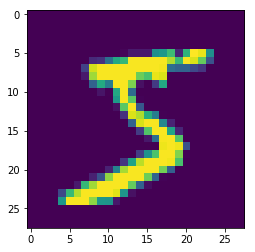

In [49]:
test_pic = train_loader.dataset[0][0][0].numpy()
plt.imshow(test_pic)
print(test_pic.shape)

Then, we define the model, object function and optimizer that we use to classify.

In [82]:
class SimpleNet(nn.Module):
# TODO:define model
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.layer1 = nn.Sequential( 
            nn.Linear(28 * 28, 300), 
            nn.BatchNorm1d(300), 
            nn.ReLU(True))
        self.layer2 = nn.Sequential( 
            nn.Linear(300, 100), 
            nn.BatchNorm1d(100), 
            nn.ReLU(True))
        self.layer3 = nn.Sequential( 
            nn.Linear(100, 10))
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

model = SimpleNet()

# TODO:define loss function and optimiter
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Next, we can start to train and evaluate!

In [83]:
# train and evaluate
training_accuracy = np.array([1,NUM_EPOCHS])
test_accuracy = np.array([1,NUM_EPOCHS])
for epoch in range(NUM_EPOCHS):
    optimizer.zero_grad()
    for images, labels in tqdm(train_loader):
        # TODO:forward + backward + optimize
        images = images.view(-1, 28 * 28)
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    # evaluate after each epoch
    # TODO:calculate the accuracy using traning and testing dataset



  0%|                                                                                          | 0/468 [00:00<?, ?it/s]

  1%|▌                                                                                 | 3/468 [00:00<00:20, 22.96it/s]

  1%|█                                                                                 | 6/468 [00:00<00:19, 23.66it/s]

  2%|█▌                                                                                | 9/468 [00:00<00:19, 23.88it/s]

  3%|██                                                                               | 12/468 [00:00<00:18, 24.26it/s]

  3%|██▌                                                                              | 15/468 [00:00<00:18, 24.36it/s]

  4%|███                                                                              | 18/468 [00:00<00:18, 24.19it/s]

  4%|███▋                                                                             | 21/468 [00:00<00:18, 24.67it/s]

  5%|████▏                    

 43%|██████████████████████████████████▎                                             | 201/468 [00:07<00:09, 27.38it/s]

 44%|██████████████████████████████████▊                                             | 204/468 [00:07<00:09, 27.50it/s]

 44%|███████████████████████████████████▍                                            | 207/468 [00:07<00:09, 27.35it/s]

 45%|███████████████████████████████████▉                                            | 210/468 [00:08<00:09, 26.33it/s]

 46%|████████████████████████████████████▍                                           | 213/468 [00:08<00:09, 26.18it/s]

 46%|████████████████████████████████████▉                                           | 216/468 [00:08<00:09, 26.22it/s]

 47%|█████████████████████████████████████▍                                          | 219/468 [00:08<00:09, 26.60it/s]

 47%|█████████████████████████████████████▉                                          | 222/468 [00:08<00:09, 26.24it/s]

 48%|███████████████████████████

 83%|██████████████████████████████████████████████████████████████████▋             | 390/468 [00:16<00:04, 15.77it/s]

 84%|███████████████████████████████████████████████████████████████████             | 392/468 [00:16<00:04, 16.63it/s]

 84%|███████████████████████████████████████████████████████████████████▎            | 394/468 [00:16<00:05, 14.35it/s]

 85%|███████████████████████████████████████████████████████████████████▋            | 396/468 [00:16<00:04, 14.58it/s]

 85%|████████████████████████████████████████████████████████████████████▏           | 399/468 [00:16<00:04, 15.85it/s]

 86%|████████████████████████████████████████████████████████████████████▋           | 402/468 [00:17<00:03, 16.84it/s]

 86%|█████████████████████████████████████████████████████████████████████           | 404/468 [00:17<00:03, 17.00it/s]

 87%|█████████████████████████████████████████████████████████████████████▍          | 406/468 [00:17<00:03, 16.99it/s]

 87%|███████████████████████████

 23%|██████████████████▎                                                             | 107/468 [00:04<00:15, 22.61it/s]

 24%|██████████████████▊                                                             | 110/468 [00:04<00:15, 22.80it/s]

 24%|███████████████████▎                                                            | 113/468 [00:04<00:15, 22.83it/s]

 25%|███████████████████▊                                                            | 116/468 [00:05<00:14, 23.66it/s]

 25%|████████████████████▎                                                           | 119/468 [00:05<00:14, 24.40it/s]

 26%|████████████████████▊                                                           | 122/468 [00:05<00:14, 24.58it/s]

 27%|█████████████████████▎                                                          | 125/468 [00:05<00:13, 24.64it/s]

 27%|█████████████████████▉                                                          | 128/468 [00:05<00:14, 24.03it/s]

 28%|██████████████████████▍    

 66%|████████████████████████████████████████████████████▋                           | 308/468 [00:12<00:05, 26.76it/s]

 66%|█████████████████████████████████████████████████████▏                          | 311/468 [00:12<00:05, 26.91it/s]

 67%|█████████████████████████████████████████████████████▋                          | 314/468 [00:12<00:05, 26.80it/s]

 68%|██████████████████████████████████████████████████████▏                         | 317/468 [00:12<00:05, 26.79it/s]

 68%|██████████████████████████████████████████████████████▋                         | 320/468 [00:13<00:05, 26.58it/s]

 69%|███████████████████████████████████████████████████████▏                        | 323/468 [00:13<00:05, 26.50it/s]

 70%|███████████████████████████████████████████████████████▋                        | 326/468 [00:13<00:05, 25.70it/s]

 70%|████████████████████████████████████████████████████████▏                       | 329/468 [00:13<00:05, 26.01it/s]

 71%|███████████████████████████

  7%|█████▎                                                                           | 31/468 [00:01<00:24, 17.94it/s]

  7%|█████▋                                                                           | 33/468 [00:01<00:25, 16.92it/s]

  7%|██████                                                                           | 35/468 [00:01<00:25, 16.80it/s]

  8%|██████▍                                                                          | 37/468 [00:01<00:24, 17.32it/s]

  8%|██████▊                                                                          | 39/468 [00:01<00:24, 17.71it/s]

  9%|███████                                                                          | 41/468 [00:02<00:23, 18.24it/s]

  9%|███████▌                                                                         | 44/468 [00:02<00:22, 19.06it/s]

 10%|████████▏                                                                        | 47/468 [00:02<00:20, 20.11it/s]

 11%|████████▋                  

 49%|██████████████████████████████████████▊                                         | 227/468 [00:09<00:09, 24.69it/s]

 49%|███████████████████████████████████████▎                                        | 230/468 [00:09<00:10, 23.07it/s]

 50%|███████████████████████████████████████▊                                        | 233/468 [00:10<00:09, 23.59it/s]

 50%|████████████████████████████████████████▎                                       | 236/468 [00:10<00:10, 23.19it/s]

 51%|████████████████████████████████████████▊                                       | 239/468 [00:10<00:09, 23.76it/s]

 52%|█████████████████████████████████████████▎                                      | 242/468 [00:10<00:09, 23.75it/s]

 52%|█████████████████████████████████████████▉                                      | 245/468 [00:10<00:09, 24.08it/s]

 53%|██████████████████████████████████████████▍                                     | 248/468 [00:10<00:09, 23.22it/s]

 54%|███████████████████████████

 91%|█████████████████████████████████████████████████████████████████████████▏      | 428/468 [00:18<00:01, 23.59it/s]

 92%|█████████████████████████████████████████████████████████████████████████▋      | 431/468 [00:18<00:01, 23.88it/s]

 93%|██████████████████████████████████████████████████████████████████████████▏     | 434/468 [00:18<00:01, 24.47it/s]

 93%|██████████████████████████████████████████████████████████████████████████▋     | 437/468 [00:18<00:01, 24.48it/s]

 94%|███████████████████████████████████████████████████████████████████████████▏    | 440/468 [00:18<00:01, 24.63it/s]

 95%|███████████████████████████████████████████████████████████████████████████▋    | 443/468 [00:18<00:01, 24.34it/s]

 95%|████████████████████████████████████████████████████████████████████████████▏   | 446/468 [00:18<00:00, 22.16it/s]

 96%|████████████████████████████████████████████████████████████████████████████▊   | 449/468 [00:19<00:00, 20.67it/s]

 97%|███████████████████████████

 32%|█████████████████████████▎                                                      | 148/468 [00:06<00:15, 20.24it/s]

 32%|█████████████████████████▊                                                      | 151/468 [00:07<00:19, 16.29it/s]

 33%|██████████████████████████▏                                                     | 153/468 [00:07<00:18, 16.81it/s]

 33%|██████████████████████████▍                                                     | 155/468 [00:07<00:18, 17.16it/s]

 34%|██████████████████████████▊                                                     | 157/468 [00:07<00:17, 17.45it/s]

 34%|███████████████████████████▏                                                    | 159/468 [00:07<00:18, 16.49it/s]

 34%|███████████████████████████▌                                                    | 161/468 [00:07<00:18, 16.96it/s]

 35%|███████████████████████████▊                                                    | 163/468 [00:07<00:19, 15.85it/s]

 35%|███████████████████████████

 70%|████████████████████████████████████████████████████████                        | 328/468 [00:15<00:07, 19.62it/s]

 71%|████████████████████████████████████████████████████████▌                       | 331/468 [00:16<00:07, 18.42it/s]

 71%|█████████████████████████████████████████████████████████                       | 334/468 [00:16<00:06, 19.76it/s]

 72%|█████████████████████████████████████████████████████████▌                      | 337/468 [00:16<00:06, 20.87it/s]

 73%|██████████████████████████████████████████████████████████                      | 340/468 [00:16<00:05, 21.44it/s]

 73%|██████████████████████████████████████████████████████████▋                     | 343/468 [00:16<00:05, 22.45it/s]

 74%|███████████████████████████████████████████████████████████▏                    | 346/468 [00:16<00:05, 21.84it/s]

 75%|███████████████████████████████████████████████████████████▋                    | 349/468 [00:16<00:05, 21.91it/s]

 75%|███████████████████████████

  7%|█████▋                                                                           | 33/468 [00:01<00:21, 20.50it/s]

  8%|██████▏                                                                          | 36/468 [00:01<00:21, 20.56it/s]

  8%|██████▊                                                                          | 39/468 [00:01<00:20, 21.44it/s]

  9%|███████▎                                                                         | 42/468 [00:02<00:19, 21.57it/s]

 10%|███████▊                                                                         | 45/468 [00:02<00:19, 21.39it/s]

 10%|████████▎                                                                        | 48/468 [00:02<00:19, 21.54it/s]

 11%|████████▊                                                                        | 51/468 [00:02<00:19, 21.55it/s]

 12%|█████████▎                                                                       | 54/468 [00:02<00:19, 21.52it/s]

 12%|█████████▊                 

 50%|████████████████████████████████████████                                        | 234/468 [00:10<00:09, 25.72it/s]

 51%|████████████████████████████████████████▌                                       | 237/468 [00:10<00:09, 25.18it/s]

 51%|█████████████████████████████████████████                                       | 240/468 [00:10<00:09, 24.93it/s]

 52%|█████████████████████████████████████████▌                                      | 243/468 [00:10<00:09, 24.81it/s]

 53%|██████████████████████████████████████████                                      | 246/468 [00:10<00:08, 24.88it/s]

 53%|██████████████████████████████████████████▌                                     | 249/468 [00:10<00:08, 24.99it/s]

 54%|███████████████████████████████████████████                                     | 252/468 [00:10<00:08, 25.43it/s]

 54%|███████████████████████████████████████████▌                                    | 255/468 [00:11<00:08, 25.30it/s]

 55%|███████████████████████████

 93%|██████████████████████████████████████████████████████████████████████████▎     | 435/468 [00:18<00:01, 25.39it/s]

 94%|██████████████████████████████████████████████████████████████████████████▊     | 438/468 [00:18<00:01, 25.33it/s]

 94%|███████████████████████████████████████████████████████████████████████████▍    | 441/468 [00:18<00:01, 25.55it/s]

 95%|███████████████████████████████████████████████████████████████████████████▉    | 444/468 [00:18<00:00, 25.39it/s]

 96%|████████████████████████████████████████████████████████████████████████████▍   | 447/468 [00:18<00:00, 25.40it/s]

 96%|████████████████████████████████████████████████████████████████████████████▉   | 450/468 [00:18<00:00, 25.54it/s]

 97%|█████████████████████████████████████████████████████████████████████████████▍  | 453/468 [00:18<00:00, 25.63it/s]

 97%|█████████████████████████████████████████████████████████████████████████████▉  | 456/468 [00:19<00:00, 25.50it/s]

 98%|███████████████████████████

 35%|████████████████████████████▏                                                   | 165/468 [00:06<00:12, 24.70it/s]

 36%|████████████████████████████▋                                                   | 168/468 [00:06<00:11, 25.04it/s]

 37%|█████████████████████████████▏                                                  | 171/468 [00:06<00:11, 25.03it/s]

 37%|█████████████████████████████▋                                                  | 174/468 [00:06<00:11, 25.02it/s]

 38%|██████████████████████████████▎                                                 | 177/468 [00:07<00:11, 25.20it/s]

 38%|██████████████████████████████▊                                                 | 180/468 [00:07<00:11, 24.95it/s]

 39%|███████████████████████████████▎                                                | 183/468 [00:07<00:11, 25.16it/s]

 40%|███████████████████████████████▊                                                | 186/468 [00:07<00:11, 25.30it/s]

 40%|███████████████████████████

 78%|██████████████████████████████████████████████████████████████▌                 | 366/468 [00:14<00:04, 24.85it/s]

 79%|███████████████████████████████████████████████████████████████                 | 369/468 [00:14<00:03, 25.08it/s]

 79%|███████████████████████████████████████████████████████████████▌                | 372/468 [00:14<00:03, 25.37it/s]

 80%|████████████████████████████████████████████████████████████████                | 375/468 [00:14<00:03, 25.20it/s]

 81%|████████████████████████████████████████████████████████████████▌               | 378/468 [00:14<00:03, 24.89it/s]

 81%|█████████████████████████████████████████████████████████████████▏              | 381/468 [00:15<00:03, 25.04it/s]

 82%|█████████████████████████████████████████████████████████████████▋              | 384/468 [00:15<00:03, 24.66it/s]

 83%|██████████████████████████████████████████████████████████████████▏             | 387/468 [00:15<00:03, 24.76it/s]

 83%|███████████████████████████

 21%|████████████████▌                                                                | 96/468 [00:03<00:15, 24.21it/s]

 21%|█████████████████▏                                                               | 99/468 [00:04<00:15, 24.27it/s]

 22%|█████████████████▍                                                              | 102/468 [00:04<00:15, 24.24it/s]

 22%|█████████████████▉                                                              | 105/468 [00:04<00:15, 24.11it/s]

 23%|██████████████████▍                                                             | 108/468 [00:04<00:15, 23.24it/s]

 24%|██████████████████▉                                                             | 111/468 [00:04<00:15, 23.52it/s]

 24%|███████████████████▍                                                            | 114/468 [00:04<00:14, 23.77it/s]

 25%|████████████████████                                                            | 117/468 [00:04<00:14, 23.90it/s]

 26%|████████████████████▌      

 63%|██████████████████████████████████████████████████▊                             | 297/468 [00:12<00:07, 23.80it/s]

 64%|███████████████████████████████████████████████████▎                            | 300/468 [00:12<00:06, 24.22it/s]

 65%|███████████████████████████████████████████████████▊                            | 303/468 [00:12<00:06, 24.45it/s]

 65%|████████████████████████████████████████████████████▎                           | 306/468 [00:12<00:06, 24.55it/s]

 66%|████████████████████████████████████████████████████▊                           | 309/468 [00:13<00:07, 21.59it/s]

 67%|█████████████████████████████████████████████████████▎                          | 312/468 [00:13<00:08, 18.01it/s]

 67%|█████████████████████████████████████████████████████▋                          | 314/468 [00:13<00:08, 17.18it/s]

 68%|██████████████████████████████████████████████████████                          | 316/468 [00:13<00:08, 17.33it/s]

 68%|███████████████████████████

  5%|████▏                                                                            | 24/468 [00:00<00:17, 25.19it/s]

  6%|████▋                                                                            | 27/468 [00:01<00:17, 24.76it/s]

  6%|█████▏                                                                           | 30/468 [00:01<00:17, 24.65it/s]

  7%|█████▋                                                                           | 33/468 [00:01<00:17, 24.75it/s]

  8%|██████▏                                                                          | 36/468 [00:01<00:17, 24.22it/s]

  8%|██████▊                                                                          | 39/468 [00:01<00:17, 23.87it/s]

  9%|███████▎                                                                         | 42/468 [00:01<00:17, 24.02it/s]

 10%|███████▊                                                                         | 45/468 [00:01<00:17, 24.07it/s]

 10%|████████▎                  

 48%|██████████████████████████████████████▍                                         | 225/468 [00:09<00:10, 23.78it/s]

 49%|██████████████████████████████████████▉                                         | 228/468 [00:09<00:09, 24.31it/s]

 49%|███████████████████████████████████████▍                                        | 231/468 [00:09<00:09, 24.16it/s]

 50%|████████████████████████████████████████                                        | 234/468 [00:10<00:09, 23.66it/s]

 51%|████████████████████████████████████████▌                                       | 237/468 [00:10<00:09, 23.37it/s]

 51%|█████████████████████████████████████████                                       | 240/468 [00:10<00:09, 23.72it/s]

 52%|█████████████████████████████████████████▌                                      | 243/468 [00:10<00:09, 23.98it/s]

 53%|██████████████████████████████████████████                                      | 246/468 [00:10<00:09, 24.21it/s]

 53%|███████████████████████████

 91%|████████████████████████████████████████████████████████████████████████▊       | 426/468 [00:18<00:01, 23.46it/s]

 92%|█████████████████████████████████████████████████████████████████████████▎      | 429/468 [00:18<00:01, 23.62it/s]

 92%|█████████████████████████████████████████████████████████████████████████▊      | 432/468 [00:18<00:01, 22.76it/s]

 93%|██████████████████████████████████████████████████████████████████████████▎     | 435/468 [00:19<00:01, 22.80it/s]

 94%|██████████████████████████████████████████████████████████████████████████▊     | 438/468 [00:19<00:01, 23.20it/s]

 94%|███████████████████████████████████████████████████████████████████████████▍    | 441/468 [00:19<00:01, 23.44it/s]

 95%|███████████████████████████████████████████████████████████████████████████▉    | 444/468 [00:19<00:01, 23.77it/s]

 96%|████████████████████████████████████████████████████████████████████████████▍   | 447/468 [00:19<00:00, 23.90it/s]

 96%|███████████████████████████

 31%|████████████████████████▊                                                       | 145/468 [00:06<00:18, 17.78it/s]

 31%|█████████████████████████▏                                                      | 147/468 [00:06<00:17, 18.25it/s]

 32%|█████████████████████████▍                                                      | 149/468 [00:06<00:17, 17.84it/s]

 32%|█████████████████████████▊                                                      | 151/468 [00:06<00:17, 17.65it/s]

 33%|██████████████████████████▏                                                     | 153/468 [00:06<00:18, 17.48it/s]

 33%|██████████████████████████▍                                                     | 155/468 [00:07<00:18, 16.71it/s]

 34%|██████████████████████████▊                                                     | 157/468 [00:07<00:19, 16.13it/s]

 34%|███████████████████████████▏                                                    | 159/468 [00:07<00:19, 16.09it/s]

 34%|███████████████████████████

 66%|████████████████████████████████████████████████████▋                           | 308/468 [00:15<00:09, 16.80it/s]

 66%|█████████████████████████████████████████████████████▏                          | 311/468 [00:15<00:08, 17.64it/s]

 67%|█████████████████████████████████████████████████████▌                          | 313/468 [00:15<00:09, 17.12it/s]

 67%|█████████████████████████████████████████████████████▊                          | 315/468 [00:15<00:09, 16.98it/s]

 68%|██████████████████████████████████████████████████████▏                         | 317/468 [00:15<00:08, 17.01it/s]

 68%|██████████████████████████████████████████████████████▌                         | 319/468 [00:15<00:08, 16.95it/s]

 69%|██████████████████████████████████████████████████████▊                         | 321/468 [00:15<00:08, 16.99it/s]

 69%|███████████████████████████████████████████████████████▏                        | 323/468 [00:16<00:08, 16.94it/s]

 69%|███████████████████████████

 95%|███████████████████████████████████████████████████████████████████████████▋    | 443/468 [00:23<00:01, 16.29it/s]

 95%|████████████████████████████████████████████████████████████████████████████    | 445/468 [00:23<00:01, 16.69it/s]

 96%|████████████████████████████████████████████████████████████████████████████▍   | 447/468 [00:23<00:01, 16.72it/s]

 96%|████████████████████████████████████████████████████████████████████████████▊   | 449/468 [00:23<00:01, 16.30it/s]

 96%|█████████████████████████████████████████████████████████████████████████████   | 451/468 [00:23<00:01, 16.37it/s]

 97%|█████████████████████████████████████████████████████████████████████████████▍  | 453/468 [00:24<00:00, 15.05it/s]

 97%|█████████████████████████████████████████████████████████████████████████████▊  | 455/468 [00:24<00:00, 14.68it/s]

 98%|██████████████████████████████████████████████████████████████████████████████  | 457/468 [00:24<00:00, 15.47it/s]

 98%|███████████████████████████

 31%|████████████████████████▊                                                       | 145/468 [00:07<00:14, 22.24it/s]

 32%|█████████████████████████▎                                                      | 148/468 [00:07<00:14, 22.69it/s]

 32%|█████████████████████████▊                                                      | 151/468 [00:07<00:13, 23.50it/s]

 33%|██████████████████████████▎                                                     | 154/468 [00:07<00:13, 23.53it/s]

 34%|██████████████████████████▊                                                     | 157/468 [00:08<00:12, 23.96it/s]

 34%|███████████████████████████▎                                                    | 160/468 [00:08<00:12, 23.86it/s]

 35%|███████████████████████████▊                                                    | 163/468 [00:08<00:13, 23.07it/s]

 35%|████████████████████████████▍                                                   | 166/468 [00:08<00:13, 22.25it/s]

 36%|███████████████████████████

 74%|███████████████████████████████████████████████████████████▏                    | 346/468 [00:16<00:05, 22.26it/s]

 75%|███████████████████████████████████████████████████████████▋                    | 349/468 [00:16<00:05, 21.90it/s]

 75%|████████████████████████████████████████████████████████████▏                   | 352/468 [00:16<00:05, 22.19it/s]

 76%|████████████████████████████████████████████████████████████▋                   | 355/468 [00:16<00:05, 22.05it/s]

 76%|█████████████████████████████████████████████████████████████▏                  | 358/468 [00:17<00:04, 22.25it/s]

 77%|█████████████████████████████████████████████████████████████▋                  | 361/468 [00:17<00:04, 22.00it/s]

 78%|██████████████████████████████████████████████████████████████▏                 | 364/468 [00:17<00:04, 22.21it/s]

 78%|██████████████████████████████████████████████████████████████▋                 | 367/468 [00:17<00:04, 22.37it/s]

 79%|███████████████████████████

#### Q5:
Please print the training and testing accuracy.

In [84]:
test_accuracy = 0
train_accuracy = 0
for data, target in test_loader:
    data = data.view(-1, 28 * 28)
    output = model(data)
    pred = output.max(1, keepdim=True)[1]
    test_accuracy += pred.eq(target.view_as(pred)).sum().item()
for data, target in train_loader:
    data = data.view(-1, 28 * 28)
    output = model(data)
    pred = output.max(1, keepdim=True)[1]
    train_accuracy += pred.eq(target.view_as(pred)).sum().item()

test_accuracy /= len(test_loader.dataset)
train_accuracy /= len(train_loader.dataset)

In [85]:
print(test_accuracy)
print(train_accuracy)

0.9561
0.969
